In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:

# Data from the table
data = [
    ("1 worker", "1 thread", "--dist=load", [104.97, 80.48, 79.59], 88.35, "All Passed", []),
    ("1 worker", "1 thread", "--dist=no", [76.72, 76.66, 86.73], 80.04, "All Passed", []),
    ("1 worker", "auto thread", "--dist=load", [1421.97, 1295.59, 271.71], 996.42, "2 Failed", 
     ["tests/test_heap.py::TestBinaryHeap::test_insert", "tests/test_compression.py::TestHuffmanCoding::test_huffman_coding"]),
    ("1 worker", "auto thread", "--dist=no", [1277.41, 1388.20, 1348.73], 1338.11, "1 Failed", 
     ["tests/test_heap.py::TestBinaryHeap::test_insert"]),
    ("auto worker", "1 thread", "--dist=load", [91.09, 91.67, 96.65], 93.14, "All Passed", []),
    ("auto worker", "1 thread", "--dist=no", [93.88, 94.14, 97.06], 95.01, "All Passed", []),
    ("auto worker", "auto thread", "--dist=load", [1155.11, 1268.63, 1258.72], 1227.49, "2 Failed", 
     ["tests/test_heap.py::TestBinaryHeap::test_insert", "tests/test_linkedlist.py::TestSuite::test_is_palindrome"]),
    ("auto worker", "auto thread", "--dist=no", [1434.36, 1539.60, 1397.67], 1457.21, "2 Failed", 
     ["tests/test_heap.py::TestBinaryHeap::test_insert", "tests/test_linkedlist.py::TestSuite::test_is_palindrome"])
]

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Worker Count", "Thread Count", "Dist Mode", "Times", "Avg Time", "Failures", "Failed Tests"])

In [4]:
df

,Worker Count,Thread Count,Dist Mode,Times,Avg Time,Failures,Failed Tests
0,1 worker,1 thread,--dist=load,"[104.97, 80.48, 79.59]",88.35,All Passed,[]
1,1 worker,1 thread,--dist=no,"[76.72, 76.66, 86.73]",80.04,All Passed,[]
2,1 worker,auto thread,--dist=load,"[1421.97, 1295.59, 271.71]",996.42,2 Failed,[tests/test_heap.py::TestBinaryHeap::test_inse...
3,1 worker,auto thread,--dist=no,"[1277.41, 1388.2, 1348.73]",1338.11,1 Failed,[tests/test_heap.py::TestBinaryHeap::test_insert]
4,auto worker,1 thread,--dist=load,"[91.09, 91.67, 96.65]",93.14,All Passed,[]
5,auto worker,1 thread,--dist=no,"[93.88, 94.14, 97.06]",95.01,All Passed,[]
6,auto worker,auto thread,--dist=load,"[1155.11, 1268.63, 1258.72]",1227.49,2 Failed,[tests/test_heap.py::TestBinaryHeap::test_inse...
7,auto worker,auto thread,--dist=no,"[1434.36, 1539.6, 1397.67]",1457.21,2 Failed,[tests/test_heap.py::TestBinaryHeap::test_inse...


C:\Users\DELL\AppData\Local\Temp\ipykernel_8708\1035530414.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.yticks(df.index, df[["Worker Count", "Thread Count", "Dist Mode"]].apply(lambda x: f"{x[0]}, {x[1]}, {x[2]}", axis=1))


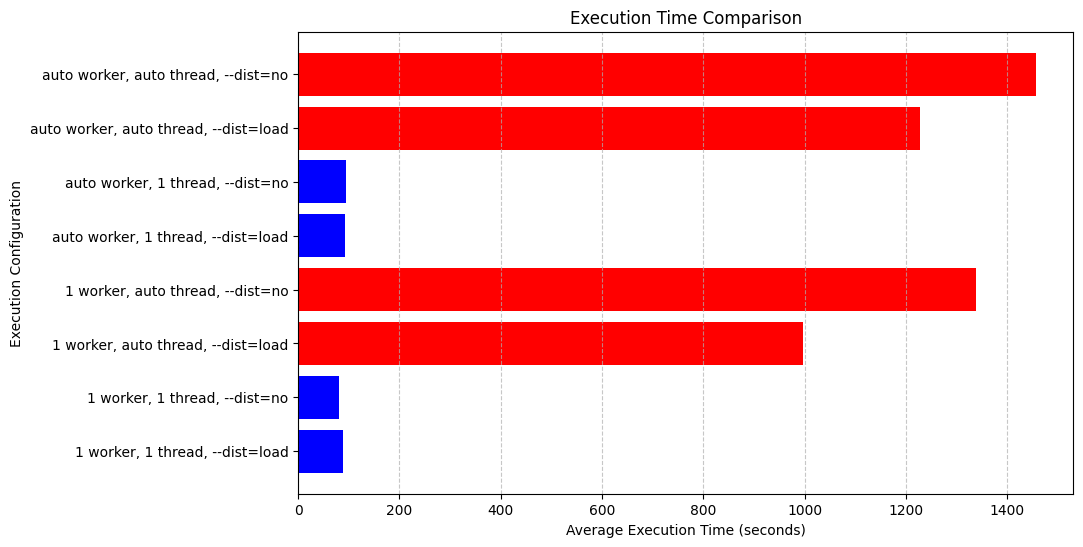

In [5]:

# Compute speedup ratios (compared to slowest)
sequential_time = df[df["Worker Count"] == "1 worker"]["Avg Time"].max()
df["Speedup"] = sequential_time / df["Avg Time"]

# Plot execution time comparison
plt.figure(figsize=(10, 6))
plt.barh(df.index, df["Avg Time"], color=['blue' if "All Passed" in status else 'red' for status in df["Failures"]])
plt.xlabel("Average Execution Time (seconds)")
plt.ylabel("Execution Configuration")
plt.yticks(df.index, df[["Worker Count", "Thread Count", "Dist Mode"]].apply(lambda x: f"{x[0]}, {x[1]}, {x[2]}", axis=1))
plt.title("Execution Time Comparison")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8708\3489937541.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.yticks(df.index, df[["Worker Count", "Thread Count", "Dist Mode"]].apply(lambda x: f"{x[0]}, {x[1]}, {x[2]}", axis=1))


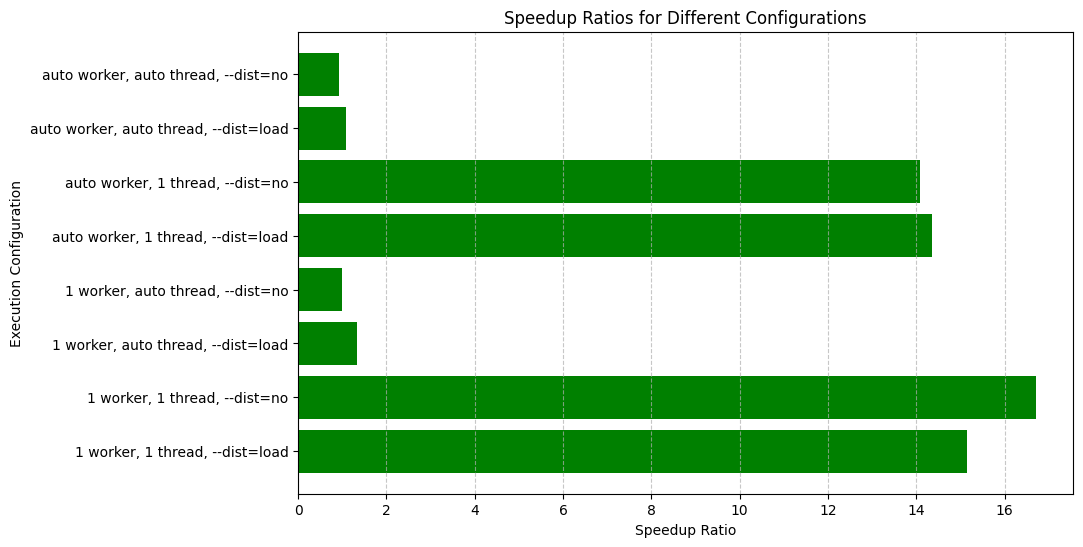

In [6]:
# Plot speedup ratio
plt.figure(figsize=(10, 6))
plt.barh(df.index, df["Speedup"], color='green')
plt.xlabel("Speedup Ratio")
plt.ylabel("Execution Configuration")
plt.yticks(df.index, df[["Worker Count", "Thread Count", "Dist Mode"]].apply(lambda x: f"{x[0]}, {x[1]}, {x[2]}", axis=1))
plt.title("Speedup Ratios for Different Configurations")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()